# Linear Regression with multiple variables

<a id="look_data"></a>

[Familiarity with data](#look_data)

[Working with NaN data](#NaN)

[Working with string data](#strings)

[Standardization](#standardization)

[Algorithm](#algorithm)

[Results](#results)

[Predictions](#predictions)

**First of all, we need to import all useful packages and load our data.**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 7]
plt.style.use('fivethirtyeight')

In [2]:
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')
test_data.head()
print(train_data.shape)
print(test_data.shape)

(1460, 81)
(1459, 80)


In [3]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
train_y = np.array(train_data['SalePrice'])

In [6]:
# We deleted Id column because it had no influence on our prediction, and 'SalePrice' because it is not a feature.
test_ids = test_data['Id']

train_data.drop(columns = ['Id', 'SalePrice'], inplace = True)
test_data.drop(columns = ['Id'], inplace = True)

<a id='NaN'></a>

[Familiarity with data](#look_data)

[Working with NaN data](#NaN)

[Working with string data](#strings)

[Standardization](#standardization)

[Algorithm](#algorithm)

[Results](#results)

[Predictions](#predictions)


## Cleaning data

### Working with NaN data

Looking on our data we can see, that there are NaN variables in some columns. We need to replace them with such logic:

* Replace NaN with mean value of the column, if there is a 'float' dtype, and this data should be.
* Replace NaN with 0.0, if there is a 'float' dtype, but this columns are dependent of another columns, and there are NaN values because a house doesn't have some feature (for example, there is no Garage in the house. In this reason there is no Area of the Garage, and we will place 0.0's in 'GarageArea')
* Replace NaN with 'None', if there is a 'string' dtype, and there are NaN values because data don't exist.
* Delete columns with NaN, if more then 90% of data in the column are NaN.



In [7]:
# We concat all data to easier clean both train and test data

all_data = pd.concat([train_data, test_data], axis=0)
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [8]:
# Look at all columns with NaN data

null_columns = all_data.columns[all_data.isna().any()].tolist()
print(null_columns)

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [9]:
# DELETE ALL NAN 
total_cells = all_data['MSZoning'].size
total_missing = all_data['MSZoning'].isna().sum()
print((total_missing/total_cells)*100)
print(total_missing)
all_data['MSZoning'] = all_data['MSZoning'].fillna('RL')
all_data['MSZoning'].value_counts()

0.1370332305584104
4


RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [10]:
all_data['LotFrontage'] = all_data['LotFrontage'].fillna(all_data['LotFrontage'].mean())  # Mean value

In [11]:
total_cells = all_data['Alley'].size
total_missing = all_data['Alley'].isna().sum()
print((total_missing/total_cells)*100)
print(total_missing)
all_data.drop(columns=['Alley'], inplace=True)  # Delete column 

93.21685508735868
2721


In [12]:
total_cells = all_data['Utilities'].size
total_missing = all_data['Utilities'].isna().sum()
print((total_missing/total_cells)*100)
print(total_missing)
all_data['Utilities'] = all_data['Utilities'].fillna('AllPub')
all_data['Utilities'].value_counts()

0.0685166152792052
2


AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

In [13]:
total_cells = all_data['Exterior2nd'].size
total_missing = all_data['Exterior2nd'].isna().sum()
print((total_missing/total_cells)*100)
print(total_missing)
all_data['Exterior1st'] = all_data['Exterior1st'].fillna('VinylSd')
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna('VinylSd')
all_data['Exterior2nd'].value_counts()

0.0342583076396026
1


VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [14]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')
all_data['MasVnrType'].value_counts()  # No veneer

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [15]:
 all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0.0)

In [16]:
total_cells = all_data['BsmtQual'].size
total_missing = all_data['BsmtQual'].isna().sum()
print((total_missing/total_cells)*100)
print(total_missing)
all_data['BsmtQual'] = all_data['BsmtQual'].fillna('None')
all_data['BsmtQual'].value_counts()

2.774922918807811
81


TA      1283
Gd      1209
Ex       258
Fa        88
None      81
Name: BsmtQual, dtype: int64

In [17]:
total_cells = all_data['BsmtCond'].size
total_missing = all_data['BsmtCond'].isna().sum()
print((total_missing/total_cells)*100)
print(total_missing)
all_data['BsmtCond'] = all_data['BsmtCond'].fillna('None')

2.8091812264474134
82


In [18]:
total_cells = all_data['BsmtExposure'].size
total_missing = all_data['BsmtExposure'].isna().sum()
print((total_missing/total_cells)*100)
print(total_missing)
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna('None')

2.8091812264474134
82


In [19]:
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna('None')
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna('None')

In [20]:
total_cells = all_data['BsmtFinSF1'].size
total_missing = all_data['BsmtFinSF1'].isna().sum()
print((total_missing/total_cells)*100)
print(total_missing)
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(0)
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0)
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0)

0.0342583076396026
1


In [21]:
total_cells = all_data['Electrical'].size
total_missing = all_data['Electrical'].isna().sum()
print((total_missing/total_cells)*100)
print(total_missing)
all_data['Electrical'] = all_data['Electrical'].fillna('SBrkr')
all_data['Electrical'].value_counts()

0.0342583076396026
1


SBrkr    2672
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [22]:
total_cells = all_data['BsmtFullBath'].size
total_missing = all_data['BsmtFullBath'].isna().sum()
print((total_missing/total_cells)*100)
print(total_missing)
all_data['BsmtFullBath'] = all_data['BsmtFullBath'].fillna(0)
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)

0.0685166152792052
2


In [23]:
total_cells = all_data['KitchenQual'].size
total_missing = all_data['KitchenQual'].isna().sum()
print((total_missing/total_cells)*100)
print(total_missing)
all_data['KitchenQual'] = all_data['KitchenQual'].fillna('TA')
all_data['KitchenQual'].value_counts()

0.0342583076396026
1


TA    1493
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [24]:
total_cells = test_data['Functional'].size
total_missing = test_data['Functional'].isna().sum()
print((total_missing/total_cells)*100)
print(total_missing)
all_data['Functional'] = all_data['Functional'].fillna('Typ')
all_data['Functional'].value_counts()

0.1370801919122687
2


Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [25]:
total_cells = all_data['FireplaceQu'].size
total_missing = all_data['FireplaceQu'].isna().sum()
print((total_missing/total_cells)*100)
print(total_missing)
all_data['FireplaceQu'] = all_data['FireplaceQu'].fillna('None')
all_data['FireplaceQu'].value_counts()

48.646796848235695
1420


None    1420
Gd       744
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

In [26]:
all_data['GarageType'] = all_data['GarageType'].fillna('None')
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(0.0)
all_data['GarageFinish'] = all_data['GarageFinish'].fillna('None')
all_data['GarageQual'] = all_data['GarageQual'].fillna('None')
all_data['GarageCond'] = all_data['GarageCond'].fillna('None')
all_data['GarageCars'] = all_data['GarageCars'].fillna(0)
all_data['GarageArea'] = all_data['GarageArea'].fillna(0)

In [27]:
all_data['PoolQC'] = all_data['PoolQC'].fillna('None')

In [28]:
all_data['Fence'] = all_data['Fence'].fillna('None')

In [29]:
all_data['MiscFeature'] = all_data['MiscFeature'].fillna('None')

In [30]:
total_cells = all_data['SaleType'].size
total_missing = all_data['SaleType'].isna().sum()
print((total_missing/total_cells)*100)
print(total_missing)
all_data['SaleType'] = all_data['SaleType'].fillna('WD')
all_data['SaleType'].value_counts()

0.0342583076396026
1


WD       2526
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

<a id='strings'></a>

[Familiarity with data](#look_data)

[Working with NaN data](#NaN)

[Working with string data](#strings)

[Standardization](#standardization)

[Algorithm](#algorithm)

[Results](#results)

[Predictions](#predictions)


## Working with string data
There are a lot of string data, but our model would work only with numbers. So, we need to transform strings. We will do this, using ***One Hot Encoding***

In [31]:
# Find all string columns
str_columns = all_data.loc[:, all_data.dtypes == 'object'].columns.tolist()
str_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [32]:
# Using 'get_dummies' function from pandas, we transform every string column in data and delete the last one of created
# to prevent multicollinearity

for column in str_columns:
    all_data = pd.get_dummies(all_data, column, columns = [column])
    all_data.drop(all_data.columns[-1], axis='columns', inplace = True)
print(all_data.shape)
all_data

(2919, 257)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,0,0,0,0,0,1


<a id='standardization'></a>

[Familiarity with data](#look_data)

[Working with NaN data](#NaN)

[Working with string data](#strings)

[Standardization](#standardization)

[Algorithm](#algorithm)

[Results](#results)

[Predictions](#predictions)


## Standardization

We have only numbers in our data, but this numbers are scattered over the wide range. Calculation would take a lot of time. Moreover, we would and with too big numbers and get nan as a result for example. To prevent this, we will do ***standardization*** using this formula:

$$X_{new} = \frac{X - \mu}{\sigma}$$

In [33]:
all_data = all_data.to_numpy()  # Convert data to numpy array

# Calculate mean value and standart deviation for every column
mean = all_data.mean(axis=0, keepdims=True)  
std = all_data.std(axis=0, keepdims=True)

# Split our data on train and test like in the beginning
train_x = all_data[:1460, :]
test_x = all_data[1460:, :]

# Standardize the data
train_x = (train_x - mean) / std
test_x = (test_x - mean) / std


In [34]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)

(1460, 257)
(1459, 257)
(1460,)


<a id='algorithm'></a>

[Familiarity with data](#look_data)

[Working with NaN data](#NaN)

[Working with string data](#strings)

[Standardization](#standardization)

[Algorithm](#algorithm)

[Results](#results)

[Predictions](#predictions)


## Realization of algorithm

There is a realisation of linear regression with multiple variables.

In [35]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros((dim, 1))
    b = 0


    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [36]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient

    Arguments:
    w -- weights, a numpy array of size (number of features, 1)
    b -- bias, a scalar
    X -- data of shape (number of features, number of examples)
    Y -- results of shape (1, number of examples)
    
    Return:
    cost -- cost function for linear regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    """
    
    m = X.shape[0]
    # FORWARD PROPAGATION (FROM X TO COST)
    H = np.dot(X, w) + b     # compute activation

    Y = Y.reshape((H.size, 1))
    cost = np.sum((H-Y)**2)/(2*m) # compute cost
    # BACKWARD PROPAGATION (TO FIND GRAD)

    dw = np.dot(X.T, (H - Y)) / m
    db = np.sum(H - Y) / m

    assert(dw.shape == w.shape)

    cost = np.squeeze(cost)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [37]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (number of features, 1)
    b -- bias, a scalar
    X -- data of shape (number of features, number of examples)
    Y -- results of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation

        grads, cost = propagate(w, b, X, Y)

        plt.scatter(cost, i)
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [38]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    """
    Predict using learned linear regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (number of features, 1)
    b -- bias, a scalar
    X -- data of shape (number of features, number of examples)
    
    Returns:
    H -- a numpy array (vector) containing all predictions for the examples in X
    """
    
    m = X.shape[0]
    
    # Compute vector "H"
    H = np.dot(X, w) + b
    H = H.reshape((1, m))
    
    assert(H.shape == (1, m))
    
    return H

In [39]:
def model(X_train, Y_train, X_test, num_iterations=1000, learning_rate=0.01, print_cost=False):
    """
    Builds the linear regression model
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (number of features, m_train)
    Y_train -- training values represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (number of features, m_test)
    Y_test -- test values represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X_train.shape[1])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
        
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)

    # Print train/test Errors
    print ("Train MAPE: {} ".format(np.mean(np.abs((Y_prediction_train - Y_train)/Y_train))))
    
    d = {"costs": costs,
         "Y_prediction_train" : Y_prediction_train, 
         "Y_prediction_test" : Y_prediction_test, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

<a id='results'></a>

[Familiarity with data](#look_data)

[Working with NaN data](#NaN)

[Working with string data](#strings)

[Standardization](#standardization)

[Algorithm](#algorithm)

[Results](#results)

[Predictions](#predictions)


## Accuracy and results

Now we can fit our model, see how our cost function was changed and see how good our model will predict train data.

Cost after iteration 0: 19519633853.882877
Cost after iteration 100: 2450904169.969963
Cost after iteration 200: 612645074.815992
Cost after iteration 300: 316115348.186854
Cost after iteration 400: 254524295.580171
Cost after iteration 500: 236797095.448536
Cost after iteration 600: 229665035.081909
Cost after iteration 700: 225951399.965835
Cost after iteration 800: 223669578.362669
Cost after iteration 900: 222115316.496843
Train MAPE: 0.07975679360109268 


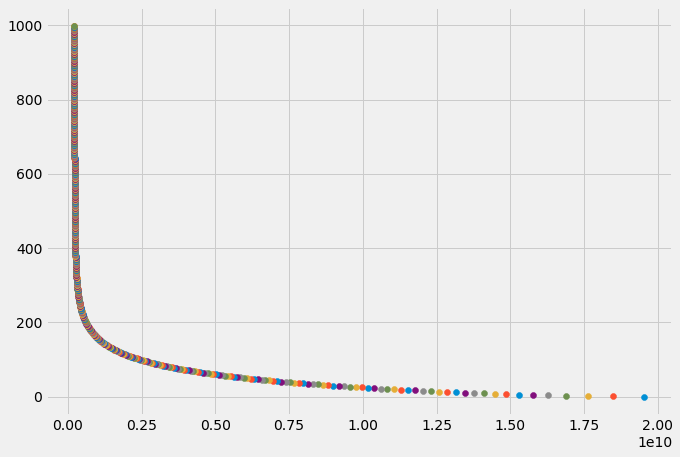

In [40]:
# Train the model and plot changing of the cost function
d = model(train_x, train_y, test_x, num_iterations=1000, learning_rate=0.01, print_cost=True)

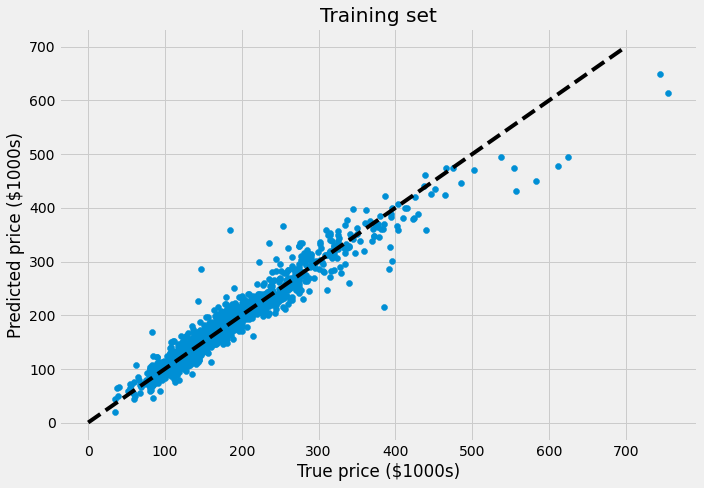

In [41]:
# Train set
plt.title("Training set")
plt.scatter(train_y/1000, d["Y_prediction_train"]/1000)
plt.plot([0, 700], [0, 700], "--k")
plt.axis("tight")
plt.xlabel("True price ($1000s)")
plt.ylabel("Predicted price ($1000s)")
plt.tight_layout()

We can see, that our model works well with the train data.

<a id='predictions'></a>

[Familiarity with data](#look_data)

[Working with NaN data](#NaN)

[Working with string data](#strings)

[Standardization](#standardization)

[Algorithm](#algorithm)

[Results](#results)

[Predictions](#predictions)


## Predictions
We predicted prices using the test data before, so now we would save the results in the csv file.

In [42]:
predictions = pd.concat([test_ids, pd.DataFrame(d["Y_prediction_test"].T)], axis = 1)
predictions.rename(columns={0: 'SalePrice'}, inplace=True)
predictions.set_index('Id', inplace=True)
predictions

,SalePrice
Id,
1461,111801.639325
1462,157178.254137
1463,184714.423671
1464,195147.189369
1465,205699.420077
...,...
2915,79264.907887
2916,81302.733628
2917,179214.613533


In [43]:
predictions.to_csv('prediction.csv')